### Visualize Conv Filters 

Code in tnis notebook shows how to visualize TF/Keras ConvNet filters. 

The code is located at 

```
/drv3/hm3/code/python/tf2.18/tf2.18/local/visualizations/Visualize_CNNFilterActivations_Inception.ipynb

```

The model is loaded from the TF/Keras APIS. It uses the weights from ImageNet.


The visualizations are stored at the directory 

```
/drv3/hm3/code/python/tf2.18/tf2.18/local/visualizations/VisualizeConvFilters/
```





In [1]:
# get the libraries ready
import os
import shutil, pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.utils import load_img, img_to_array
from keras.utils import array_to_img
from keras.utils import image_dataset_from_directory
from keras import layers



2025-02-20 12:18:02.400909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740071882.412339   24975 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740071882.415805   24975 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 12:18:02.428936: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# define codeDir for getting code and saving images
codeDir = "/drv3/hm3/code/python/tf2.18/tf2.18/local/visualizations/"
imgVisualizationsDir = codeDir + "VisualizeConvFilters/"

In [3]:
# Get xCeption pretrained model
 
model = keras.applications.xception.Xception( weights = "imagenet", include_top = False  )


I0000 00:00:1740071894.350807   24975 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9596 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:08:00.0, compute capability: 8.6


In [4]:
## display model.summary() only if necessary
model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, None,      │        864 │ input_layer[0][0] │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, None,      │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, None,      │          0 │ block1_conv1_bn[… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, None,      │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, None,      │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, None,      │          0 │ block1_conv2_bn[… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, None,      │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, None,      │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, None,      │          0 │ block2_sepconv1_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, None,      │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, None,      │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │      8,192 │ block1_conv2_act… │
│                     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, None,      │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None,      │          0 │ block2_pool[0][0… │
│                     │ None, 128)        │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, None,      │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [5]:
# print the names of all the layers type Conv2D and  SeparableConvolution2D that are present in the model 

for layer in model.layers :
    if isinstance (layer, (keras.layers.Conv2D, keras.layers.SeparableConvolution2D)) :
        print( layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d
block3_sepconv1
block3_sepconv2
conv2d_1
block4_sepconv1
block4_sepconv2
conv2d_2
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_3
block14_sepconv1
block14_sepconv2


In [18]:
# I retrieved a cat image from the location below: 
# img_path = keras.utils.get_file( fname="cat.jpg", origin = "https://img-datasets.s3.amazonaws.com/cat.jpg")
# which I stored at the path below:


# img_size = (180, 180)

img_size = (299,299) # according to Chollet, Xceptiopn was trained with img_size = (299,299)

img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/cat_img_from_amazon_s3.jpg"
imgName = "CatS3"

#img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/cat.444.jpg"
#imgName = "Cat444"

#img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/dog.582.jpg"
#imgName = "Dog582"

#img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/baby_794.jpg"
#imgName = "Baby794"


# after seeing the impressive results, I decided to run another experiment with a different image
# which I think I got when I wast working with PCS/SVD for immage reconstruction
# img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/cat.444.jpg"

# results were equally impressive. So I tried to use the image of a dog,
# img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/dog.582.jpg"

# again, impressive results. I guess the NN is "well" trained to recognize eyes and nose in imgs.
# Then I tried with the face of a baby:
# img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/baby_794.jpg"

In [19]:
# get sample img as a tensor
def get_img_array( img_path, target_size) :
    img = keras.utils.load_img( img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size= img_size)

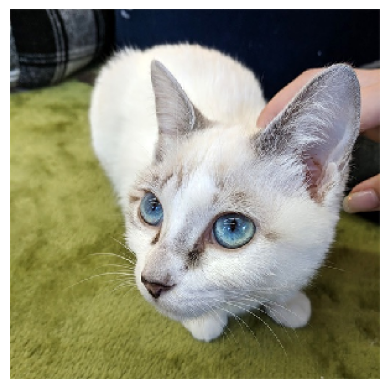

In [20]:
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()


In [21]:
# select the filters in the layers named below 

layer_name = "block3_sepconv1" 
# layer_name = "block4_sepconv1"
# layer_name = "block5_sepconv1"
# layer_name = "block9_sepconv1"
# layer_name = "block4_sepconv1"
layer_name = "block14_sepconv1"

layer = model.get_layer(name = layer_name)
feature_extractor = keras.Model( inputs = model.input, outputs=layer.output)


In [22]:
activation = feature_extractor( keras.applications.xception.preprocess_input(img_tensor))

In [23]:
def compute_loss ( image, filter_index) :
    activation = feature_extractor(image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)


In [24]:
# loss maximization via stocastic gradient ascent
@tf.function
def gradient_ascent_step( image, filter_index, learning_rate) :
    with tf.GradientTape() as tape :
        tape.watch(image)
        loss = compute_loss(image, filter_index)
        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize( grads) 
        image += learning_rate * grads
        return image
    

In [25]:
# Function to generate Filter activations
#img_width = 200
#img_height = 200

img_width = 299
img_height = 299

def generate_filter_pattern( filter_index ) :
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform( minval=0.4, maxval=0.6, shape=(1, img_width, img_height, 3))
    for i in range ( iterations) :
        image = gradient_ascent_step( image, filter_index, learning_rate)
    return image[0].numpy()

    

In [26]:
# Utility function to convert a tensor into a valid img
def deprocess_image(image) :
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip( image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :]
    return image



Layer name = block14_sepconv1


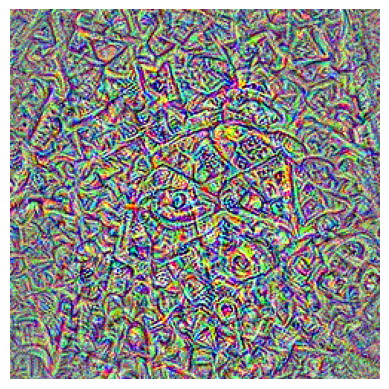

In [27]:
print("Layer name =", layer_name)
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=2)))            



Layer name = block14_sepconv1


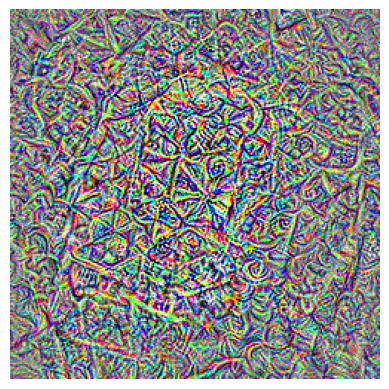

In [ ]:
print("Layer name =", layer_name)
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=2)))     
 

In [29]:
# Generate a grid of all filter responses in layer selected as "layer_name} in cell 5 of this notebook "

all_images = []
for filter_index in range (64) :
    print(f"Processing filter {filter_index}")
    image = deprocess_image ( generate_filter_pattern(filter_index))
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + ( n-1 ) * margin
heigth = n * cropped_height + ( n-1 ) * margin
stitched_filters = np.zeros (( width, heigth, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image
    







Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

In [30]:
imgVisFile = imgVisualizationsDir + layer_name + imgName + "_299_" + ".jpg"
keras.utils.save_img( imgVisFile, stitched_filters)        
